In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

In [2]:
curve_fit_df = pd.read_csv('alpha_values_MaxC_60000_Grad_0.000405_curve_fit.csv')
curve_fit_df.head(10)

,deme,alpha_outliers,alpha,Curve_Fit
0,1.0,5390.0,NaN,15491.724340
1,2.0,3120.0,NaN,13211.283310
2,3.0,6270.0,NaN,11283.390810
3,4.0,7150.0,NaN,9655.528751
4,5.0,5440.0,NaN,8282.154201
5,6.0,7010.0,7010.0,7123.926796
6,7.0,6210.0,6210.0,6147.003270
7,8.0,5430.0,5430.0,5322.394775
8,9.0,4660.0,4660.0,4625.382982
9,10.0,4120.0,4120.0,4034.991049


In [3]:
input_param_df = pd.read_excel('input_parameters.xlsx')
input_param_df.head()

,food_conc,drift_velocity,c_x_df_l_dc,attr_time_roc,Vo_max
0,0.211633,0.068255,0.022403,6.192934e-07,12.521185
1,0.239944,0.077261,0.025359,7.935055e-07,12.521185
2,0.272042,0.087437,0.028699,1.016293e-06,12.521185
3,0.308433,0.098930,0.032471,1.301007e-06,12.521185
4,0.349693,0.111902,0.036729,1.664580e-06,12.521185


In [4]:
Grad = 0.000405 # µm^-1
# Receptor Probability is the component in the exponential function that's a byproduct of the alpha value and the receptor sensitivity.
# "attr_time_roc" is the time rate of change of receptor (attractant from food) protein bound, = input_param_df['drift_velocity'] * Grad * input_param_df['c_x_df_l_dc']
input_param_df['prob_tum_up'] = np.exp(-1.16 - curve_fit_df['Curve_Fit']*input_param_df['attr_time_roc'])
input_param_df['prob_tum_down'] = np.exp(-1.16 + curve_fit_df['Curve_Fit']*input_param_df['attr_time_roc'])
input_param_df.head()

,food_conc,drift_velocity,c_x_df_l_dc,attr_time_roc,Vo_max,prob_tum_up,prob_tum_down
0,0.211633,0.068255,0.022403,6.192934e-07,12.521185,0.310493,0.316508
1,0.239944,0.077261,0.025359,7.935055e-07,12.521185,0.310217,0.316790
2,0.272042,0.087437,0.028699,1.016293e-06,12.521185,0.309912,0.317102
3,0.308433,0.098930,0.032471,1.301007e-06,12.521185,0.309573,0.317449
4,0.349693,0.111902,0.036729,1.664580e-06,12.521185,0.309194,0.317838


In [5]:
# Create a plot of the alpha values and polynomial fit.

x_values = curve_fit_df['deme']

# create traces
trace0 = go.Scatter(
    x = x_values,
    y = curve_fit_df['alpha'],
    mode = 'markers',
    name = 'alpha value points'
)
# The second trace
trace1 = go.Scatter(
    x = x_values,
    y = curve_fit_df.loc[:4, 'alpha_outliers'],
    mode = 'markers',
    name = 'alpha value outliers'
)
# The third trace
trace2 = go.Scatter(
    x = x_values,
    y = curve_fit_df['Curve_Fit'],
    mode = 'lines',
    name = 'polynomial fit'
)

# create the data
data = [trace0, trace1, trace2]  # assign traces to data

# create the layout
layout = go.Layout(
    title = 'Alpha values and polynomial curve fit.  Outliers are where receptor sensitivity is too low that the program cannot calculate exponentially increasing values.'
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

In [6]:
# Create a plot of the alpha values and polynomial fit.

x_values = curve_fit_df['deme']

# create traces
trace0 = go.Scatter(
    x = x_values,
    y = input_param_df['prob_tum_down'],
    mode = 'lines',
    name = 'probability of tumbling going down gradient'
)
# The second trace
trace1 = go.Scatter(
    x = x_values,
    y = input_param_df['prob_tum_up'],
    mode = 'lines',
    name = 'probability of tumbling going up gradient'
)
# create the data
data = [trace0, trace1]  # assign traces to data

# create the layout
layout = go.Layout(
    title = "probability of tumbling = exp(-d +/- alpha*receptor)"
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

In [2]:
pos_v_time_df = pd.read_excel('pos_v_time_MaxC_60000_Grad_0.000405_No1.xlsx')
pos_v_time_df2 = pd.read_excel('pos_v_time_MaxC_60000_Grad_0.000405_No2.xlsx')
pos_v_time_df3 = pd.read_excel('pos_v_time_MaxC_60000_Grad_0.000405_No3.xlsx')
pos_v_time_df4 = pd.read_excel('pos_v_time_MaxC_60000_Grad_0.000405_No4.xlsx')

In [7]:
pos_v_time_df['drift_velocity'] = 0
for i in pos_v_time_df.index[1:]:
    pos_v_time_df.loc[i, 'drift_velocity'] = pos_v_time_df.loc[i, 'position'] - pos_v_time_df.loc[i-1, 'position'] # divided by (dt = 1s)

pos_v_time_df2['drift_velocity'] = 0
for i in pos_v_time_df2.index[1:]:
    pos_v_time_df2.loc[i, 'drift_velocity'] = pos_v_time_df2.loc[i, 'position'] - pos_v_time_df2.loc[i-1, 'position'] # divided by (dt = 1s)

print(f"{pos_v_time_df.describe()}\n{pos_v_time_df2.describe()}")

               time      position  drift_velocity
count  26001.000000  26001.000000    26001.000000
mean   13000.000000  13201.983310        1.192554
std     7505.986511  10437.502400        8.185214
min        0.000000      0.000000      -12.521185
25%     6500.000000   3627.910732       -6.593762
50%    13000.000000  10019.291827        2.231642
75%    19500.000000  24915.366197        8.783177
max    26000.000000  31010.756208       12.521185
               time      position  drift_velocity
count  31945.000000  31945.000000    31945.000000
mean   15972.000000   8400.769229        0.979844
std     9221.871511   9532.942836        8.279225
min        0.000000      0.000000      -12.521185
25%     7986.000000   1572.925210       -6.809762
50%    15972.000000   3655.519847        1.742612
75%    23958.000000  12690.874695        8.853815
max    31944.000000  31301.112065       12.521185


In [8]:
pos_v_time_df3['drift_velocity'] = 0
for i in pos_v_time_df3.index[1:]:
    pos_v_time_df3.loc[i, 'drift_velocity'] = pos_v_time_df3.loc[i, 'position'] - pos_v_time_df3.loc[i-1, 'position'] # divided by (dt = 1s)

pos_v_time_df4['drift_velocity'] = 0
for i in pos_v_time_df4.index[1:]:
    pos_v_time_df4.loc[i, 'drift_velocity'] = pos_v_time_df4.loc[i, 'position'] - pos_v_time_df4.loc[i-1, 'position'] # divided by (dt = 1s)

print(f"{pos_v_time_df3.describe()}\n{pos_v_time_df4.describe()}")

               time      position  drift_velocity
count  14555.000000  14555.000000    14555.000000
mean    7277.000000  19526.709735        1.746250
std     4201.810919   7920.124910        8.180275
min        0.000000   5743.687293      -12.521185
25%     3638.500000  11512.417578       -5.878340
50%     7277.000000  23422.125133        3.240721
75%    10915.500000  25273.558731        9.287579
max    14554.000000  31307.925030       12.521185
               time      position  drift_velocity
count  30067.000000  30067.000000    30067.000000
mean   15033.000000  10552.027162        1.041029
std     8679.739608  10541.696936        8.222859
min        0.000000      0.000000      -12.521185
25%     7516.500000   1075.166139       -6.819526
50%    15033.000000   5786.475033        1.958745
75%    22549.500000  22379.120484        8.759086
max    30066.000000  31301.860912       12.521185


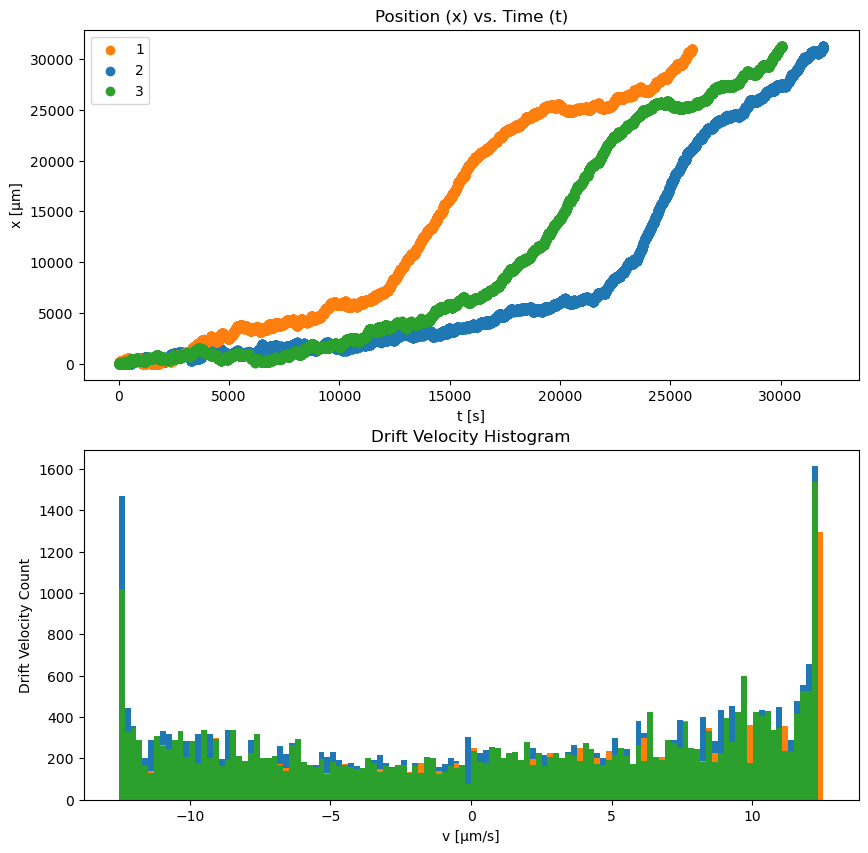

In [13]:
hist_bins = 120
counts, bins = np.histogram(pos_v_time_df['drift_velocity'], bins=hist_bins, density=False)
counts2, bins2 = np.histogram(pos_v_time_df2['drift_velocity'], bins=hist_bins, density=False)
counts3, bins3 = np.histogram(pos_v_time_df3['drift_velocity'], bins=hist_bins, density=False)
counts4, bins4 = np.histogram(pos_v_time_df4['drift_velocity'], bins=hist_bins, density=False)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
plot2 = axes[0].scatter(x=pos_v_time_df2['time'], y=pos_v_time_df2['position'])
plot1 = axes[0].scatter(x=pos_v_time_df['time'], y=pos_v_time_df['position'])
# plot3 = axes[0].scatter(x=pos_v_time_df3['time'], y=pos_v_time_df3['position'])
plot3 = axes[0].scatter(x=pos_v_time_df4['time'], y=pos_v_time_df4['position'])
axes[0].set_title('Position (x) vs. Time (t)')
axes[0].set_xlabel('t [s]')
axes[0].set_ylabel('x [µm]')
axes[0].legend([plot1, plot2, plot3], ['1', '2', '3'])

axes[1].hist(bins[:-1], bins2, weights=counts2)
axes[1].hist(bins[:-1], bins, weights=counts)
# axes[1].hist(bins[:-1], bins3, weights=counts3)
axes[1].hist(bins[:-1], bins4, weights=counts4)
axes[1].set_title('Drift Velocity Histogram')
axes[1].set_xlabel('v [µm/s]')
axes[1].set_ylabel('Drift Velocity Count')
plt.show()

In [31]:
# For deme i = 20, position = 6200.
# Get a list of time where the bacteria is past this position
time1 = pos_v_time_df[pos_v_time_df['position'] >= 6200].iloc[0, 0]
time2 = pos_v_time_df2[pos_v_time_df2['position'] >= 6200].iloc[0, 0]
time3 = pos_v_time_df3[pos_v_time_df3['position'] >= 6200].iloc[0, 0]
time4 = pos_v_time_df4[pos_v_time_df4['position'] >= 6200].iloc[0, 0]

C:\Users\Mike\AppData\Local\Temp\ipykernel_10632\1968529346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_v_time_df_timefilt['time'] = pos_v_time_df_timefilt['time'] - time1
C:\Users\Mike\AppData\Local\Temp\ipykernel_10632\1968529346.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_v_time_df2_timefilt['time'] = pos_v_time_df2_timefilt['time'] - time2
C:\Users\Mike\AppData\Local\Temp\ipykernel_10632\1968529346.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

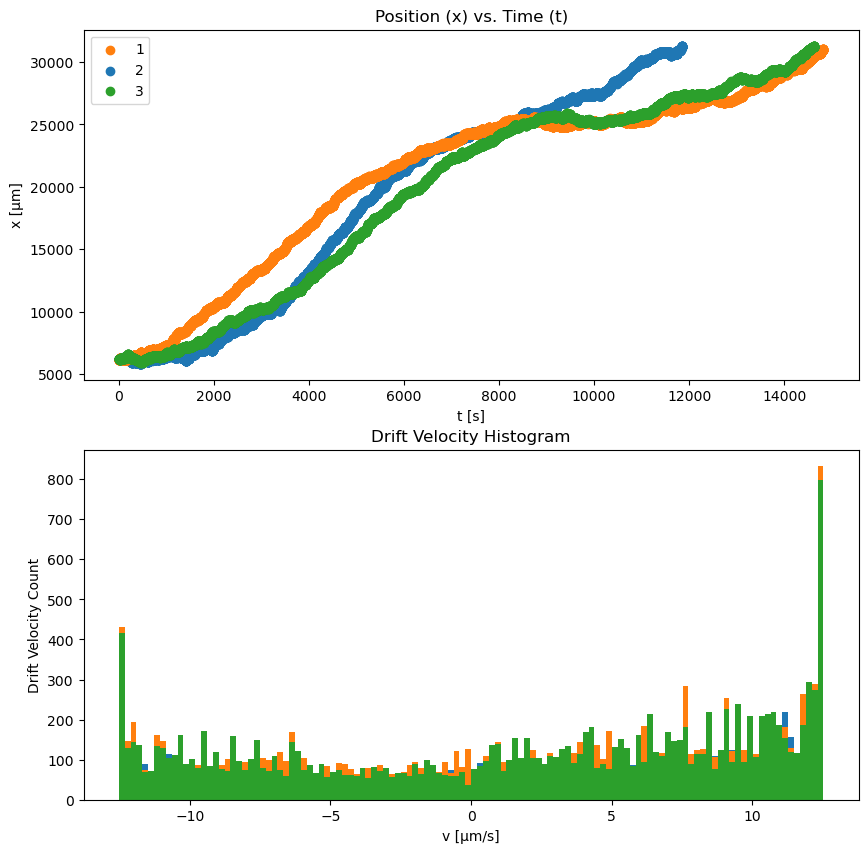

In [32]:
hist_bins = 120
pos_v_time_df_timefilt = pos_v_time_df[pos_v_time_df['time'] >= time1]
pos_v_time_df_timefilt['time'] = pos_v_time_df_timefilt['time'] - time1
pos_v_time_df_timefilt = pos_v_time_df_timefilt.reset_index(drop=False)
counts, bins = np.histogram(pos_v_time_df_timefilt['drift_velocity'], bins=hist_bins, density=False)

pos_v_time_df2_timefilt = pos_v_time_df2[pos_v_time_df2['time'] >= time2]
pos_v_time_df2_timefilt['time'] = pos_v_time_df2_timefilt['time'] - time2
pos_v_time_df2_timefilt = pos_v_time_df2_timefilt.reset_index(drop=False)
counts2, bins2 = np.histogram(pos_v_time_df2_timefilt['drift_velocity'], bins=hist_bins, density=False)

pos_v_time_df3_timefilt = pos_v_time_df3[pos_v_time_df3['time'] >= time3]
pos_v_time_df3_timefilt['time'] = pos_v_time_df3_timefilt['time'] - time3
pos_v_time_df3_timefilt = pos_v_time_df3_timefilt.reset_index(drop=False)
counts3, bins3 = np.histogram(pos_v_time_df3_timefilt['drift_velocity'], bins=hist_bins, density=False)

pos_v_time_df4_timefilt = pos_v_time_df4[pos_v_time_df4['time'] >= time4]
pos_v_time_df4_timefilt['time'] = pos_v_time_df4_timefilt['time'] - time4
pos_v_time_df4_timefilt = pos_v_time_df4_timefilt.reset_index(drop=False)
counts4, bins4 = np.histogram(pos_v_time_df4_timefilt['drift_velocity'], bins=hist_bins, density=False)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
plot2 = axes[0].scatter(x=pos_v_time_df2_timefilt['time'], y=pos_v_time_df2_timefilt['position'])
plot1 = axes[0].scatter(x=pos_v_time_df_timefilt['time'], y=pos_v_time_df_timefilt['position'])
# plot3 = axes[0].scatter(x=pos_v_time_df3_timefilt['time'], y=pos_v_time_df3_timefilt['position'])
plot4 = axes[0].scatter(x=pos_v_time_df4_timefilt['time'], y=pos_v_time_df4_timefilt['position'])
axes[0].set_title('Position (x) vs. Time (t)')
axes[0].set_xlabel('t [s]')
axes[0].set_ylabel('x [µm]')
axes[0].legend([plot1, plot2, plot4], ['1', '2', '3'])

axes[1].hist(bins[:-1], bins2, weights=counts2)
axes[1].hist(bins[:-1], bins, weights=counts)
# axes[1].hist(bins[:-1], bins3, weights=counts3)
axes[1].hist(bins[:-1], bins4, weights=counts4)
axes[1].set_title('Drift Velocity Histogram')
axes[1].set_xlabel('v [µm/s]')
axes[1].set_ylabel('Drift Velocity Count')
plt.show()

In [19]:
def approx_drift_velocity(dataframe, vel=None,time=None):
    if vel is None or time is None:
        vel = []
        time = []
        vel.append(0)
        time.append(0)
    for i in dataframe.index:
        if (i % 500 == 0) and (i > 0):
            del_vel = (dataframe.loc[i, 'position'] - dataframe.loc[i-500, 'position'])/500
            vel.append(del_vel)
            time.append(i)
    return vel, time

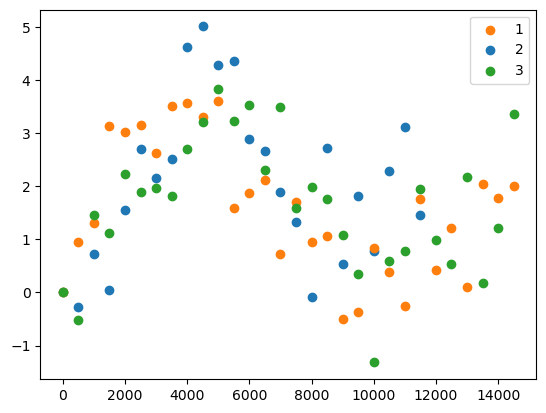

In [29]:
vel1, time1 = approx_drift_velocity(pos_v_time_df_timefilt)
vel2, time2 = approx_drift_velocity(pos_v_time_df2_timefilt)
# vel3, time3 = approx_drift_velocity(pos_v_time_df3)
vel4, time4 = approx_drift_velocity(pos_v_time_df4_timefilt)
# reg_coef = np.polyfit(time, vel, 3)
fig, axes = plt.subplots()
plot2 = axes.scatter(x=time2, y=vel2)
plot1 = axes.scatter(x=time1, y=vel1)
# plot3 = axes.scatter(x=time3, y=vel3)
plot4 = axes.scatter(x=time4, y=vel4)
axes.legend([plot1, plot2, plot4], ['1', '2', '3'])
plt.show()